In [ ]:
!pip install opendatasets
import opendatasets as od 
import pathlib,re,torch
from lxml import etree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/PROJECTIONS

/content/drive/MyDrive/PROJECTIONS


In [ ]:
od.download('https://www.kaggle.com/datasets/andrewmvd/face-mask-detection')#f42a719ce5057ddc4741bf7f415ce98e

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lokesh2004
Your Kaggle Key: ··········


100%|██████████| 398M/398M [00:02<00:00, 195MB/s]


In [ ]:
!mkdir labels

In [ ]:
def path(i):
    # parse the XML file
    tree = etree.parse(f'{str(i)}')
    #print(tree)
    # convert the tree to a string
    xml_string = etree.tostring(tree, pretty_print=True)
    s=xml_string.decode()
    xml=s.split('\n')
    #print(xml)
    
    s_in=xml.index(r'    <size>')+1
    e_in=xml.index(r'    </size>')
    w,h,d=map(int,re.findall('\d+','\n'.join(xml[s_in:e_in])))
    #print(w,h,d)
    f_name=re.findall(r'>[a-zA-Z0-9]+.png','\n'.join(xml))
    f_name=f_name[0][1:]
    #print(f_name.split('.')[0])
    x=f_name.split('.')[0]
    f=open(f'{x}.txt','w')
    
    while xml.count('    <object>'):
        s_in,e_in=xml.index('    <object>'),xml.index('    </object>')
        st=xml[s_in:e_in]
        name=re.findall(r'<name>([a-zA-Z0-9_]+)</name>','\n'.join(st))[0]
        xmin,ymin,xmax,ymax=map(int,re.findall('\d+','\n'.join(st))[3:])
        xml[s_in],xml[e_in]=8,9
        #print(name,xmin/w,ymin/h,xmax/w,ymax/h)
        if name =='with_mask':name=0
        elif name=='without_mask':name=1
        else:name=2
        f.write(str(name)+' '+str(xmin/w)+' '+str(ymin/h)+' '+str(xmax/w)+' '+str(ymin/h)+'\n')
        #print(name,xmin/w,ymin/h,xmax/w,ymax/h)
    f.close()

In [ ]:
cd labels

/content/drive/MyDrive/PROJECTIONS/labels


In [ ]:
pa=list(pathlib.Path(r'/content/drive/MyDrive/PROJECTIONS/face-mask-detection/annotations').glob('*'))
for i in pa:
    path(i)

In [ ]:
with open('classes.txt','w') as f:
    f.write('with_mask\nwithout_mask\nmask_weared_incorrect\n')

In [ ]:
cd ..

/content/drive/MyDrive/PROJECTIONS


In [ ]:
!mkdir main
%cd main
!mkdir train
!mkdir val
%cd ..

/content/drive/MyDrive/PROJECTIONS/main
/content/drive/MyDrive/PROJECTIONS


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15002, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 15002 (delta 1), reused 3 (delta 1), pack-reused 14995
Receiving objects: 100% (15002/15002), 14.03 MiB | 9.30 MiB/s, done.
Resolving deltas: 100% (10287/10287), done.


In [ ]:
!nvidia-smi

Tue Jan 24 07:11:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    26W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%pwd
%cd yolov5

/content/drive/MyDrive/PROJECTIONS/yolov5


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.9 MB/s eta 0:00:00


In [ ]:
pwd

'/content/drive/MyDrive/PROJECTIONS/yolov5'

In [ ]:
cd ..

/content/drive/MyDrive/PROJECTIONS


# ***TRAIN & VALIDATION MOVING THE DATA TO THE FOLDER***

In [ ]:
ip=list(pathlib.Path('/content/drive/MyDrive/PROJECTIONS/face-mask-detection/images').glob('*.png'))

In [ ]:
ls 

face-mask-detection/  labels/  main/  yolov5/


In [ ]:
lp=list(pathlib.Path('/content/drive/MyDrive/PROJECTIONS/labels').glob('*.txt'))

In [ ]:
tr=ip[:int(len(ip)*0.8)]
val=ip[int(len(ip)*0.8):]

In [ ]:
import shutil
def copyfile(i,d):
    shutil.copy2(str(i), str(d))

**MOVING THE TRAIN DATA TO TRAINING FOLDER**

In [ ]:

for i in tr:
  parts=str(i).split('/')
  lable_parts=str(i).split('/')
  lable_parts[-2]='labels'
  lable_parts.pop(-3)
  lable_parts[-1]=lable_parts[-1].split('.')[0]+'.txt'
  copyfile('/'.join(parts),'/content/drive/MyDrive/PROJECTIONS/main/train')
  copyfile('/'.join(lable_parts),'/content/drive/MyDrive/PROJECTIONS/main/train')


**MOVING THE VALIDATION DATA TO VALIDATION FOLDER**

In [ ]:
for i in tr:
  parts=str(i).split('/')
  lable_parts=str(i).split('/')
  lable_parts[-2]='labels'
  lable_parts.pop(-3)
  lable_parts[-1]=lable_parts[-1].split('.')[0]+'.txt'
  copyfile('/'.join(parts),'/content/drive/MyDrive/PROJECTIONS/main/val')
  copyfile('/'.join(lable_parts),'/content/drive/MyDrive/PROJECTIONS/main/val')


In [ ]:
pwd

'/content/drive/MyDrive/PROJECTIONS'

# TRAINING THE YOLOMODEL

In [ ]:
od.download('https://github.com/ultralytics/yolov5/releases/download/v6.2/yolov5x.pt')

174120960it [00:05, 29122962.49it/s]                               


In [ ]:
!mv /content/drive/MyDrive/PROJECTIONS/yolov5x.pt /content/drive/MyDrive/PROJECTIONS/yolov5

In [ ]:
cd /content/drive/MyDrive/PROJECTIONS/yolov5

/content/drive/MyDrive/PROJECTIONS/yolov5


In [ ]:
#@title Default title text
!python train.py --img 360 --batch 32 --epochs 100 --data coco128.yaml --weights /content/drive/MyDrive/PROJECTIONS/yolov5/runs/train/exp/weights/last.pt

requirements: YOLOv5 requirement "gitpython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.1 MB/s eta 0:00:00

requirements: 1 package updated per ['gitpython']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

train: weights=/content/drive/MyDrive/PROJECTIONS/yolov5/runs/train/exp/weights/last.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=360, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freez

# ***LOADING THE SAVED MODEL***

In [ ]:
import torch

In [ ]:
model=torch.hub.load('ultralytics/yolov5','custom',path='/content/drive/MyDrive/PROJECTIONS/yolov5/runs/train/exp/weights/last.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-1-25 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86186872 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


In [ ]:
r=model('/content/drive/MyDrive/PROJECTIONS/main/val/maksssksksss100.png')

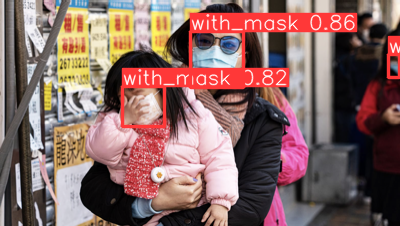

In [ ]:
r.show()

In [ ]:
torch.save(model,'/content/drive/MyDrive/PROJECTIONS/model')#$-SAVING THE YOLO MODEL AS PT FILE

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

0 0.5425 0.2610619469026549 0.14 0.25663716814159293
0 0.98375 0.2853982300884956 0.0325 0.09292035398230089
0 0.35125 0.47123893805309736 0.1125 0.17256637168141592



(226, 400, 3)

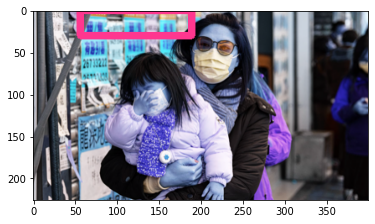

In [ ]:
#c=cv2.imread('/content/drive/MyDrive/PROJECTIONS/main/val/maksssksksss100.png')
plt.imshow(c)
with open('/content/drive/MyDrive/PROJECTIONS/main/val/maksssksksss100.txt') as f:
  print(f.read())
c.shape

In [ ]:
cv2.rectangle(c,(int(0.4725 *400),int(0.13274336283185842 *226)),(int(.6125*400)-int(0.4725 *400),int(0.13274336283185842 *226)-int(0.13274336283185842*226)),(255,55,143),8)

In [ ]:
mo=torch.load('/content/drive/MyDrive/PROJECTIONS/model')

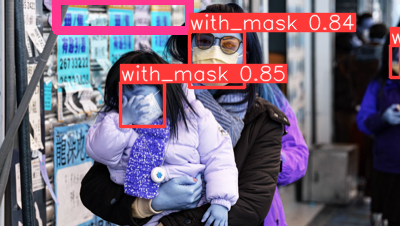